<a href="https://colab.research.google.com/github/Lera06/Pizza_Steak_Sushi_PyTorch/blob/main/04_2_Pizza_Steak_Sushi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms

# Setup data directory
import pathlib
data_dir = pathlib.Path("../data")

In [ ]:
# Get training data
train_data = datasets.Food101(root=data_dir,
                              split="train",
                              # transform=transforms.ToTensor(),
                              download=True)

# Get testing data
test_data = datasets.Food101(root=data_dir,
                             split="test",
                             # transform=transforms.ToTensor(),
                             download=True)

100%|██████████| 4996278331/4996278331 [03:49<00:00, 21728963.25it/s]


Extracting ../data/food-101.tar.gz to ../data


In [ ]:
train_data

Dataset Food101
    Number of datapoints: 75750
    Root location: ../data
    split=train

In [ ]:
class_names = train_data.classes
class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

churros


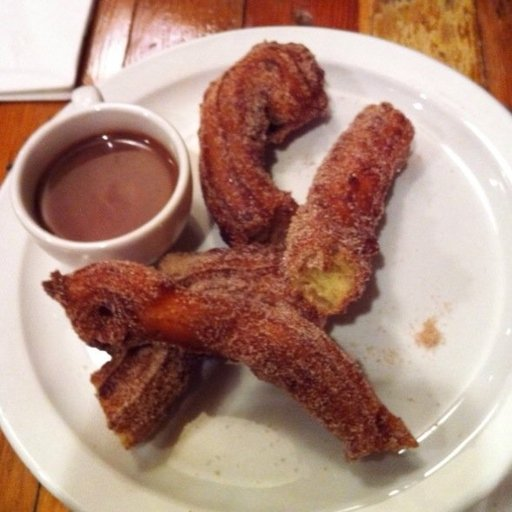

In [ ]:
# View first sample (PIL Image format)
print(class_names[train_data[0][1]])
train_data[0][0]

### Find subset of appropriate classes

Want: Steak, pizza, sushi.

Current path setup:

`../data/food-101/images/CLASS_NAME/IMAGES.jpg`

Going to get a list of the different target image classes (pizza, steak, sushi) filenames and then copy the images to separate folders.

In [ ]:
import random

# Setup data paths
data_path = data_dir / "food-101" / "images"
target_classes = ["pizza", "steak", "sushi"]

# Change amount of data to get (e.g. 0.1 = random 10%, 0.8 = random 80%)
amount_to_get = 1.0

# Create function to separate a random amount of data
def get_subset(image_path=data_path,
               data_splits=["train", "test"],
               target_classes=["pizza", "steak", "sushi"],
               amount=0.1,
               seed=42):

  random.seed(42)
  label_splits = {}

  # Get labels
  for data_split in data_splits:
    print(f"[INFO] Creating image split for: {data_split}...")
    label_path = data_dir / "food-101" / "meta" / f"{data_split}.txt"

    with open(label_path, "r") as f:
      labels = [line.strip("\n") for line in f.readlines() if line.split("/")[0] in target_classes]

      # Get random subset of target classes image ID's
      number_to_sample = round(amount * len(labels))
      print(f"[INFO] Getting random subset of {number_to_sample} images for {data_split}...")
      sampled_images = random.sample(labels, k=number_to_sample)

      # Apply full paths
      image_paths = [pathlib.Path(str(image_path / sample_image) + ".jpg") for sample_image in sampled_images]
      label_splits[data_split] = image_paths

  return label_splits

label_splits = get_subset(amount=amount_to_get)
label_splits["train"][:10]

[INFO] Creating image split for: train...
[INFO] Getting random subset of 2250 images for train...
[INFO] Creating image split for: test...
[INFO] Getting random subset of 750 images for test...


[PosixPath('../data/food-101/images/pizza/3269634.jpg'),
 PosixPath('../data/food-101/images/pizza/1524655.jpg'),
 PosixPath('../data/food-101/images/steak/2825100.jpg'),
 PosixPath('../data/food-101/images/steak/225990.jpg'),
 PosixPath('../data/food-101/images/steak/1839481.jpg'),
 PosixPath('../data/food-101/images/pizza/38349.jpg'),
 PosixPath('../data/food-101/images/pizza/3018077.jpg'),
 PosixPath('../data/food-101/images/sushi/93139.jpg'),
 PosixPath('../data/food-101/images/pizza/2702825.jpg'),
 PosixPath('../data/food-101/images/sushi/200025.jpg')]

### Move training and testing images to dedicated folders

In [ ]:
# Create target directory path
target_dir_name = f"../data/pizza_steak_sushi_{str(int(amount_to_get*100))}_percent"
print(f"Creating directory: '{target_dir_name}'")

# Setup the directories
target_dir = pathlib.Path(target_dir_name)

# Make the directories
target_dir.mkdir(parents=True, exist_ok=True)

Creating directory: '../data/pizza_steak_sushi_100_percent'


In [ ]:
target_dir

PosixPath('../data/pizza_steak_sushi_100_percent')

In [ ]:
import shutil

for image_split in label_splits.keys():
  for image_path in label_splits[str(image_split)]:
    dest_dir = target_dir / image_split / image_path.parent.stem / image_path.name
    if not dest_dir.parent.is_dir():
      dest_dir.parent.mkdir(parents=True, exist_ok=True)

    print(f"[INFO] Copying {image_path} to {dest_dir}...")
    shutil.copy2(image_path, dest_dir)

[INFO] Copying ../data/food-101/images/pizza/3269634.jpg to ../data/pizza_steak_sushi_100_percent/train/pizza/3269634.jpg...
[INFO] Copying ../data/food-101/images/pizza/1524655.jpg to ../data/pizza_steak_sushi_100_percent/train/pizza/1524655.jpg...
[INFO] Copying ../data/food-101/images/steak/2825100.jpg to ../data/pizza_steak_sushi_100_percent/train/steak/2825100.jpg...
[INFO] Copying ../data/food-101/images/steak/225990.jpg to ../data/pizza_steak_sushi_100_percent/train/steak/225990.jpg...
[INFO] Copying ../data/food-101/images/steak/1839481.jpg to ../data/pizza_steak_sushi_100_percent/train/steak/1839481.jpg...
[INFO] Copying ../data/food-101/images/pizza/38349.jpg to ../data/pizza_steak_sushi_100_percent/train/pizza/38349.jpg...
[INFO] Copying ../data/food-101/images/pizza/3018077.jpg to ../data/pizza_steak_sushi_100_percent/train/pizza/3018077.jpg...
[INFO] Copying ../data/food-101/images/sushi/93139.jpg to ../data/pizza_steak_sushi_100_percent/train/sushi/93139.jpg...
[INFO] Cop

In [ ]:
# Check lengths of directories
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str): target directory

  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  import os
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

walk_through_dir(target_dir)

There are 2 directories and 0 images in '../data/pizza_steak_sushi_100_percent'.
There are 3 directories and 0 images in '../data/pizza_steak_sushi_100_percent/test'.
There are 0 directories and 250 images in '../data/pizza_steak_sushi_100_percent/test/pizza'.
There are 0 directories and 250 images in '../data/pizza_steak_sushi_100_percent/test/steak'.
There are 0 directories and 250 images in '../data/pizza_steak_sushi_100_percent/test/sushi'.
There are 3 directories and 0 images in '../data/pizza_steak_sushi_100_percent/train'.
There are 0 directories and 750 images in '../data/pizza_steak_sushi_100_percent/train/pizza'.
There are 0 directories and 750 images in '../data/pizza_steak_sushi_100_percent/train/steak'.
There are 0 directories and 750 images in '../data/pizza_steak_sushi_100_percent/train/sushi'.


### Zip up images folder to be more easily transported

In [ ]:
# Zip pizza_steak_sushi images
zip_file_name = data_dir / f"pizza_steak_sushi_{str(int(amount_to_get*100))}_percent"
shutil.make_archive(zip_file_name,
                    format="zip",
                    root_dir=target_dir)

'/data/pizza_steak_sushi_100_percent.zip'

In [ ]:
!mkdir -p pizza_steak_sushi
!unzip ../data/pizza_steak_sushi_100_percent.zip -d pizza_steak_sushi

Archive:  ../data/pizza_steak_sushi_100_percent.zip
   creating: pizza_steak_sushi/test/
   creating: pizza_steak_sushi/train/
   creating: pizza_steak_sushi/train/pizza/
   creating: pizza_steak_sushi/train/steak/
   creating: pizza_steak_sushi/train/sushi/
  inflating: pizza_steak_sushi/train/steak/3664376.jpg  
  inflating: pizza_steak_sushi/train/steak/1658443.jpg  
  inflating: pizza_steak_sushi/train/steak/745189.jpg  
  inflating: pizza_steak_sushi/train/steak/3890465.jpg  
  inflating: pizza_steak_sushi/train/steak/1995252.jpg  
  inflating: pizza_steak_sushi/train/steak/168775.jpg  
  inflating: pizza_steak_sushi/train/steak/523535.jpg  
  inflating: pizza_steak_sushi/train/steak/525041.jpg  
  inflating: pizza_steak_sushi/train/steak/854150.jpg  
  inflating: pizza_steak_sushi/train/steak/669180.jpg  
  inflating: pizza_steak_sushi/train/steak/405794.jpg  
  inflating: pizza_steak_sushi/train/steak/2455944.jpg  
  inflating: pizza_steak_sushi/train/steak/1777107.jpg  
  infla

In [ ]:
!ls ../data

food-101  food-101.tar.gz  pizza_steak_sushi_100_percent  pizza_steak_sushi_100_percent.zip


In [ ]:
walk_through_dir("pizza_steak_sushi")

There are 2 directories and 0 images in 'pizza_steak_sushi'.
There are 3 directories and 0 images in 'pizza_steak_sushi/train'.
There are 0 directories and 750 images in 'pizza_steak_sushi/train/steak'.
There are 0 directories and 750 images in 'pizza_steak_sushi/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak_sushi/train/sushi'.
There are 3 directories and 0 images in 'pizza_steak_sushi/test'.
There are 0 directories and 250 images in 'pizza_steak_sushi/test/steak'.
There are 0 directories and 250 images in 'pizza_steak_sushi/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak_sushi/test/sushi'.


In [ ]:
# Remove a folder

# !rm -rf /content/models

In [ ]:
# Remove extra data

# import os
# os.remove("pizza_steak_sushi")
# shutil.rmtree("pizza_steak_sushi")

### Setup device agnostic-code

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

### Explore Data

In [ ]:
from pathlib import Path

# Setup image path to data folder
image_path = target_dir

In [ ]:
image_path

PosixPath('../data/pizza_steak_sushi_100_percent')

In [ ]:
# Setup train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('../data/pizza_steak_sushi_100_percent/train'),
 PosixPath('../data/pizza_steak_sushi_100_percent/test'))

In [ ]:
import random
from PIL import Image

# Set seed
# random.seed(42)

# 1. Get all image paths (* means "any combination")
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. Get random image path
random_image_path = random.choice(image_path_list)
print(random_image_path)

# 3. Get image class from path name
image_class = random_image_path.parent.stem
print(image_class)

../data/pizza_steak_sushi_100_percent/train/steak/3613455.jpg
steak


Random image path: ../data/pizza_steak_sushi_100_percent/train/steak/3613455.jpg
Image class: steak
Image height: 512
Image width: 512


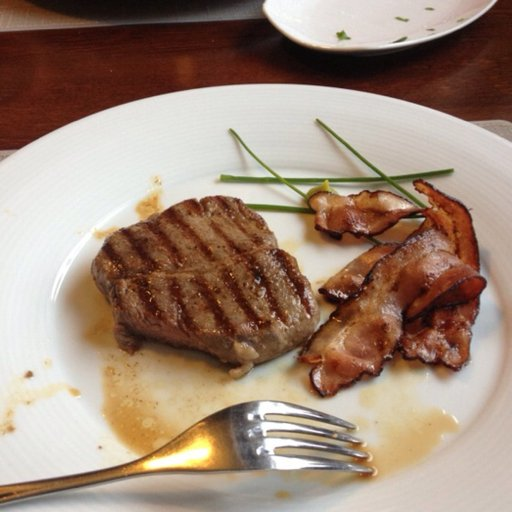

In [ ]:
# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

We can do the same with `matplotlib.pyplot.imshow()`, except we have to convert the image to a NumPy array first.

(-0.5, 511.5, 511.5, -0.5)

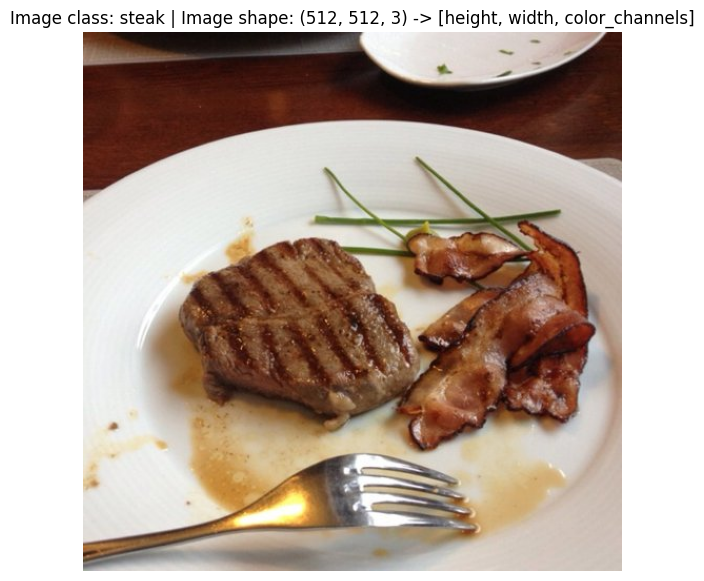

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False)

### Transforming Data

In [ ]:
data_transform = transforms.Compose([
    transforms.Resize(size=(32, 32)),
    transforms.ToTensor()
])

print(data_transform(img).shape)
print(data_transform(img).dtype)

torch.Size([3, 32, 32])
torch.float32


### Train and Test Datasets

In [ ]:
# Create train and test datasets using datasets.ImageFolder()
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 2250
     Root location: ../data/pizza_steak_sushi_100_percent/train
     StandardTransform
 Transform: Compose(
                Resize(size=(32, 32), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 750
     Root location: ../data/pizza_steak_sushi_100_percent/test
     StandardTransform
 Transform: Compose(
                Resize(size=(32, 32), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ))

In [ ]:
len(train_data), len(test_data)

(2250, 750)

In [ ]:
three_class_names = train_data.classes
three_class_names

['pizza', 'steak', 'sushi']

In [ ]:
len(set(train_data))

2250

### DataLoaders

In [ ]:
import os
from torch.utils.data import DataLoader

In [ ]:
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=NUM_WORKERS,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                              batch_size=BATCH_SIZE,
                              num_workers=NUM_WORKERS,
                              shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7d0018f086a0>,
 <torch.utils.data.dataloader.DataLoader at 0x7d0018f09270>)

In [ ]:
X, y = next(iter(train_dataloader))
X.shape, y.shape

(torch.Size([32, 3, 32, 32]), torch.Size([32]))

In [ ]:
len(train_dataloader), len(test_dataloader)

(71, 24)

### Model CNN1

In [ ]:
from torch import nn
import torch.nn.functional as F

class CNN1(nn.Module):
  def __init__(self, n_filters, p=0.0):
    super(CNN1, self).__init__()
    self.n_filters = n_filters
    self.p = p

    # Creates the convolution layers
    self.conv1 = nn.Conv2d(
              in_channels=3,
              out_channels=n_filters,
              kernel_size=3
          )
    self.conv2 = nn.Conv2d(
              in_channels=n_filters,
              out_channels=n_filters,
              kernel_size=3
          )
    # Creates the linear layers
    self.fc1 = nn.Linear(in_features=n_filters * 6 * 6,
                         out_features=50)
    self.fc2 = nn.Linear(in_features=50,
                         out_features=3)

    # Creates dropout layers
    self.drop = nn.Dropout(self.p)

  def featurizer(self, x):
    # First convolutional block
    x = self.conv1(x)
    x = F.relu(x)
    x = F.max_pool2d(x, kernel_size=2)
    # print(x.shape)

    # Second convolutional block
    x = self.conv2(x)
    x = F.relu(x)
    x = F.max_pool2d(x, kernel_size=2)
    # print(x.shape)

    # Flatten()
    x = nn.Flatten()(x)

    return x

  def classifier(self, x): # Classifier
  # Hidden Layer
    if self.p > 0:
      x = self.drop(x)
    x = self.fc1(x)
    x = F.relu(x)

    # Output Layer
    if self.p > 0:
      x = self.drop(x)
    x = self.fc2(x)

    return x

  def forward(self, x):
    x = self.featurizer(x)
    x = self.classifier(x)

    return x

In [ ]:
# Create an instance
my_model_0 = CNN1(n_filters=15, p=0.3)
my_model_0.to(device)

CNN1(
  (conv1): Conv2d(3, 15, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(15, 15, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=540, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=3, bias=True)
  (drop): Dropout(p=0.3, inplace=False)
)

In [ ]:
# Dummy Forward pass
dummy_x = torch.rand(size=[1, 3, 32, 32])
my_model_0(dummy_x.to(device))

tensor([[ 0.0407, -0.0345,  0.1539]], grad_fn=<AddmmBackward0>)

### TorchInfo

In [ ]:
!pip install torchinfo
import torchinfo

from torchinfo import summary

In [ ]:
# My model
summary(model=my_model_0,
        input_size=(32, 3, 32, 32),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
CNN1 (CNN1)                              [32, 3, 32, 32]      [32, 3]              --                   True
├─Conv2d (conv1)                         [32, 3, 32, 32]      [32, 15, 30, 30]     420                  True
├─Conv2d (conv2)                         [32, 15, 15, 15]     [32, 15, 13, 13]     2,040                True
├─Dropout (drop)                         [32, 540]            [32, 540]            --                   --
├─Linear (fc1)                           [32, 540]            [32, 50]             27,050               True
├─Dropout (drop)                         [32, 50]             [32, 50]             --                   --
├─Linear (fc2)                           [32, 50]             [32, 3]              153                  True
Total params: 29,663
Trainable params: 29,663
Non-trainable params: 0
Total mult-adds (M): 24.00
Input size (MB): 0.39
Forward/

### Train step and Test step

In [ ]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):

  # Put the model in train mode
  model.train()

  # Setup train loss and train accuracy values
  train_loss, train_acc = 0, 0

  # Loop through data loader and data batches
  for batch, (X, y) in enumerate(dataloader):
    # Send data to target device
    X, y = X.to(device), y.to(device)

    # 1. Forward pass
    y_pred = model(X)
    # print(y_pred)

    # 2. Calculate and accumulate loss
    loss = loss_fn(y_pred, y)
    train_loss += loss.item()

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Calculate and accumualte accuracy metric across all batches
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_class == y).sum().item()/len(y_pred)

  # Adjust metrics to get average loss and average accuracy per batch
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)

  return train_loss, train_acc

In [ ]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):

  # Put model in eval mode
  model.eval()

  # Setup the test loss and test accuracy values
  test_loss, test_acc = 0, 0

  # Turn on inference context manager
  with torch.inference_mode():
    # Loop through DataLoader batches
    for batch, (X, y) in enumerate(dataloader):
      # Send data to target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      test_pred_logits = model(X)
      # print(test_pred_logits)

      # 2. Calculuate and accumulate loss
      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()

      # Calculate and accumulate accuracy
      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

  # Adjust metrics to get average loss and accuracy per batch
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)

  return test_loss, test_acc

In [ ]:
from tqdm.auto import tqdm
from torch import nn

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 20):

  # Create results dictionary
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}

  # Loop through the training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
    # Train step
    train_loss, train_acc = train_step(model=model,
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer)
    # Test step
    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn)

    # Print out what's happening
    print(f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
          f"train_acc: {train_acc:.4f} | "
          f"test_loss: {test_loss:.4f} | "
          f"test_acc: {test_acc:.4f}"
    )

    # Update the results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  # Return the results dictionary
  return results

### Train a My Model

In [ ]:
# Train my_model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Create an instance
my_model_1 = CNN1(n_filters=15, p=0.3).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(my_model_1.parameters(),
                             lr=0.0018)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train
my_model_1_results = train(model=my_model_1,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=35)           # 35 for cpu

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/35 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0020 | train_acc: 0.4771 | test_loss: 0.8805 | test_acc: 0.5939
Epoch: 2 | train_loss: 0.8948 | train_acc: 0.5948 | test_loss: 0.8481 | test_acc: 0.5919
Epoch: 3 | train_loss: 0.8587 | train_acc: 0.6035 | test_loss: 0.8167 | test_acc: 0.6287
Epoch: 4 | train_loss: 0.8339 | train_acc: 0.6216 | test_loss: 0.8038 | test_acc: 0.6360
Epoch: 5 | train_loss: 0.8129 | train_acc: 0.6415 | test_loss: 0.7999 | test_acc: 0.6308
Epoch: 6 | train_loss: 0.7859 | train_acc: 0.6636 | test_loss: 0.7484 | test_acc: 0.6745
Epoch: 7 | train_loss: 0.7614 | train_acc: 0.6674 | test_loss: 0.7388 | test_acc: 0.6696
Epoch: 8 | train_loss: 0.7439 | train_acc: 0.6768 | test_loss: 0.7128 | test_acc: 0.6966
Epoch: 9 | train_loss: 0.7440 | train_acc: 0.6747 | test_loss: 0.7364 | test_acc: 0.6695
Epoch: 10 | train_loss: 0.7206 | train_acc: 0.6897 | test_loss: 0.7177 | test_acc: 0.6929
Epoch: 11 | train_loss: 0.6987 | train_acc: 0.6979 | test_loss: 0.6894 | test_acc: 0.7121
Epoch: 12 | train_l

### Plot the Loss and Accuracy curves

In [ ]:
def plot_loss_curves(results):
    """Plots training curves of a results dictionary.
    """

    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, np.array(torch.tensor(loss).cpu().numpy()), label='train_loss')
    plt.plot(epochs, np.array(torch.tensor(test_loss).cpu().numpy()), label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, np.array(torch.tensor(accuracy).cpu().numpy()), label='train_accuracy')
    plt.plot(epochs, np.array(torch.tensor(test_accuracy).cpu().numpy()), label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()

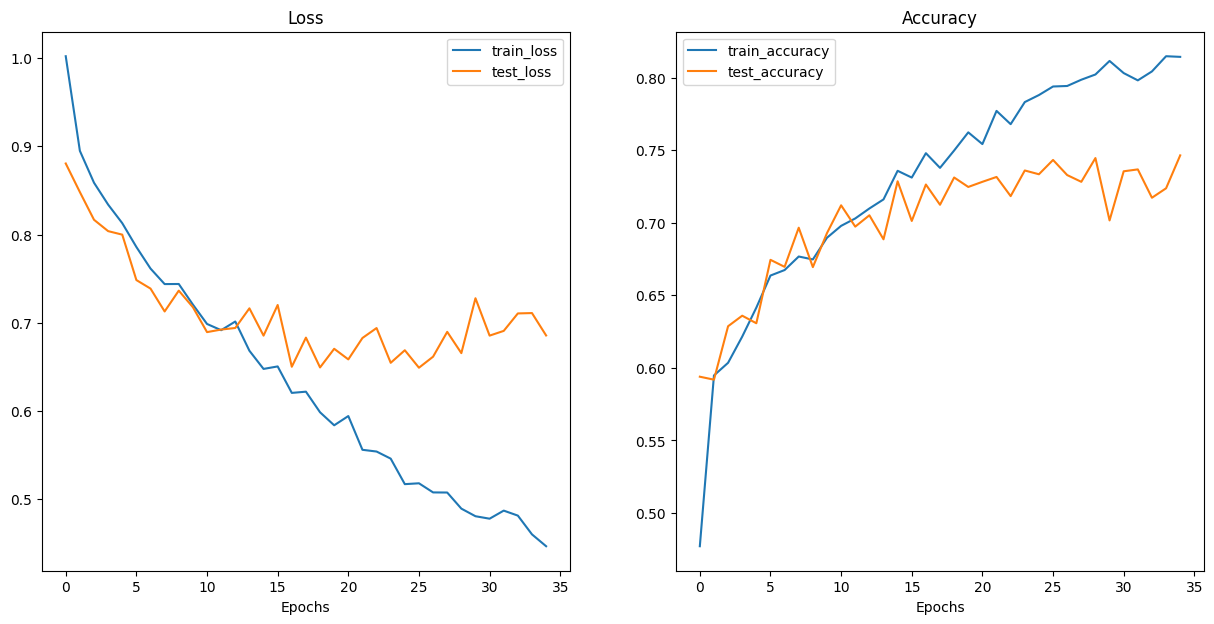

In [ ]:
plot_loss_curves(my_model_1_results)

### Make a prediction on your own custom image

In [ ]:
# Read in custom image
custom_image_path = "../data/my_pizza5.jpeg"

custom_image_uint8 = torchvision.io.read_image(str(custom_image_path)) # It should be a string (str)

# Print out image data
print(f"Custom image shape: {custom_image_uint8.shape}\n")
print(f"Custom image dtype: {custom_image_uint8.dtype}")

Custom image shape: torch.Size([3, 4032, 3024])

Custom image dtype: torch.uint8


(-0.5, 3023.5, 4031.5, -0.5)

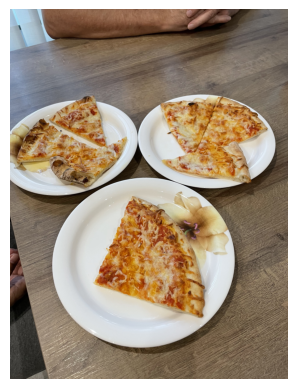

In [ ]:
# Plot the image
plt.imshow(custom_image_uint8.permute(1, 2, 0))
plt.axis(False)

In [ ]:
# Create a new simple transform
custom_image_transform = transforms.Compose([transforms.Resize((32, 32)),])

In [ ]:
# Makes a prediction on a target image and plots the image with its prediction
def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str,
                        class_names=None,
                        transform=None,
                        device: torch.device = device):

  # 1. Load in image and convert the tensor values to float32
  target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)

  # 2. Divide the image pixel values by 255 to get them between [0, 1]
  target_image = target_image / 255

  # 3. Transform if necessary
  if transform:
    target_image = transform(target_image)

  # 4. Make sure the model is on the target device
  model.to(device)

  # 5. Turn on model evaluation mode and inference mode
  model.eval()

  with torch.inference_mode():

    # Add an extra dimension to the image
    target_image = target_image.unsqueeze(dim=0)

    # Make a prediction on image with an extra dimension and send it to the target device
    target_image_pred = model(target_image.to(device))

    # 6. Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    # 7. Convert prediction probabilities -> prediction labels
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

    # 8. Plot the image alongside the prediction and prediction probability
    plt.imshow(target_image.squeeze().permute(1, 2, 0)) # make sure it's the right size for matplotlib -> remove batch dimension

  if class_names:
    title = f"Prediction: {three_class_names[target_image_pred_label.cpu()]} | Probability: {target_image_pred_probs.max().cpu():.3f}" # cpu() for matplotlib
  else:
    title = f"Prediction: {target_image_pred_label} | Probability: {target_image_pred_probs.max().cpu():.3f}"

  plt.title(title)
  plt.axis(False)

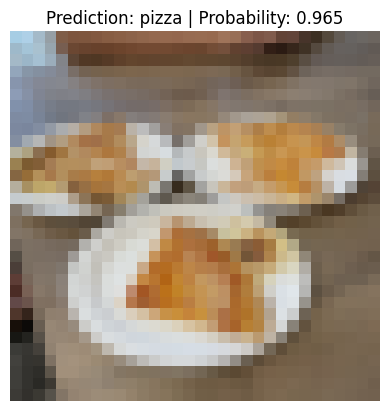

In [ ]:
pred_and_plot_image(model=my_model_1,
                    image_path=custom_image_path,
                    class_names=three_class_names,
                    transform=custom_image_transform,
                    device=device)

# Transfer Learning


See: https://www.learnpytorch.io/06_pytorch_transfer_learning/

### Transforms

* When using a **pretrained model**, it's important that **your custom data going into the model is prepared in the same way as the original training data that went into the model**.

* The images have to be loaded in to a range of **[0, 1]** and then normalized using mean = [**0.485, 0.456, 0.406]** and std = **[0.229, 0.224, 0.225]**

Manuall transform creation

In [ ]:
# manual_transforms = transforms.Compose([
#       transforms.Resize((224, 224)),
#       transforms.ToTensor(),
#       transforms.Normalize(mean=[0.485, 0.456, 0.406],
#                            std=[0.229, 0.224, 0.225])
# ])

Automatic transform creation

When you setup a model from `torchvision.models`, select the pretrained model weights:

`weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT`

In [ ]:
# Get a set of pretrained model weights
weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT # .DEFAULT = best available weights from pretraining on ImageNet
weights

EfficientNet_B0_Weights.IMAGENET1K_V1

In [ ]:
# To access the transforms associated with our weights, we can use the transforms() method.
# Get the transforms used to create our pretrained weights
auto_transforms = weights.transforms()
auto_transforms

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BICUBIC
)

### Train and Test Datasets

In [ ]:
# Create train and test datasets using auto_transforms
train_data_trained = datasets.ImageFolder(root=train_dir,
                                  transform=auto_transforms)

test_data_trained = datasets.ImageFolder(root=test_dir,
                                 transform=auto_transforms)

train_data_trained, test_data_trained

(Dataset ImageFolder
     Number of datapoints: 2250
     Root location: ../data/pizza_steak_sushi_100_percent/train
     StandardTransform
 Transform: ImageClassification(
                crop_size=[224]
                resize_size=[256]
                mean=[0.485, 0.456, 0.406]
                std=[0.229, 0.224, 0.225]
                interpolation=InterpolationMode.BICUBIC
            ),
 Dataset ImageFolder
     Number of datapoints: 750
     Root location: ../data/pizza_steak_sushi_100_percent/test
     StandardTransform
 Transform: ImageClassification(
                crop_size=[224]
                resize_size=[256]
                mean=[0.485, 0.456, 0.406]
                std=[0.229, 0.224, 0.225]
                interpolation=InterpolationMode.BICUBIC
            ))

### Train and Test Dataloaders

In [ ]:
import os
from torch.utils.data import DataLoader

In [ ]:
# Create training and testing DataLoaders as well as get a list of class names
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

train_dataloader_trained = DataLoader(dataset=train_data_trained,
                              batch_size=BATCH_SIZE,
                              num_workers=NUM_WORKERS,
                              shuffle=True)

test_dataloader_trained = DataLoader(dataset=test_data_trained,
                              batch_size=BATCH_SIZE,
                              num_workers=NUM_WORKERS,
                              shuffle=False)

train_dataloader_trained, test_dataloader_trained

(<torch.utils.data.dataloader.DataLoader at 0x7d001cfeeb60>,
 <torch.utils.data.dataloader.DataLoader at 0x7d001cfeebf0>)

In [ ]:
three_class_names = train_data_trained.classes
three_class_names

['pizza', 'steak', 'sushi']

### Getting a pretrained model

In [ ]:
# Setup the model with pretrained weights and send it to the target device
weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT
pretrained_model_1 = torchvision.models.efficientnet_b0(weights=weights).to(device)

pretrained_model_1

Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 24.0MB/s]


EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

### Getting a summary of our model with `torchinfo.summary()`

In [ ]:
# The pretrained model is torchvision.models.efficientnet_b0()
summary(model=pretrained_model_1,
        input_size=(32, 3, 224, 224),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [32, 3, 224, 224]    [32, 1000]           --                   True
├─Sequential (features)                                      [32, 3, 224, 224]    [32, 1280, 7, 7]     --                   True
│    └─Conv2dNormActivation (0)                              [32, 3, 224, 224]    [32, 32, 112, 112]   --                   True
│    │    └─Conv2d (0)                                       [32, 3, 224, 224]    [32, 32, 112, 112]   864                  True
│    │    └─BatchNorm2d (1)                                  [32, 32, 112, 112]   [32, 32, 112, 112]   64                   True
│    │    └─SiLU (2)                                         [32, 32, 112, 112]   [32, 32, 112, 112]   --                   --
│    └─Sequential (1)                                        [32, 32, 112, 112]   [32, 16, 112

### Freezing the base model and changing the output layer to suit our needs

In [ ]:
# Freeze all base layers in the "features" section of the model (the feature extractor) by setting requires_grad=False
for param in pretrained_model_1.features.parameters():
    param.requires_grad = False

In [ ]:
# Set the manual seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Get the length of class_names (one output unit for each class)
output_shape = len(three_class_names)

# Recreate the classifier layer and seed it to the target device
pretrained_model_1.classifier = nn.Sequential(
    nn.Dropout(p=0.2, inplace=True),
    nn.Linear(in_features=1280,
              out_features=output_shape,
              bias=True)).to(device)

Check the model summary after updation

In [ ]:
# # Do a summary *after* freezing the features and changing the output classifier layer
summary(pretrained_model_1,
        input_size=(32, 3, 224, 224),
        verbose=0,
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [32, 3, 224, 224]    [32, 3]              --                   Partial
├─Sequential (features)                                      [32, 3, 224, 224]    [32, 1280, 7, 7]     --                   False
│    └─Conv2dNormActivation (0)                              [32, 3, 224, 224]    [32, 32, 112, 112]   --                   False
│    │    └─Conv2d (0)                                       [32, 3, 224, 224]    [32, 32, 112, 112]   (864)                False
│    │    └─BatchNorm2d (1)                                  [32, 32, 112, 112]   [32, 32, 112, 112]   (64)                 False
│    │    └─SiLU (2)                                         [32, 32, 112, 112]   [32, 32, 112, 112]   --                   --
│    └─Sequential (1)                                        [32, 32, 112, 112]   [32, 

### Train model

In [ ]:
# Train the pretrained model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Setup loss and optimizer
loss_fn_trained = nn.CrossEntropyLoss()
optimizer_trained = torch.optim.Adam(pretrained_model_1.parameters(),
                             lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_cnn1
pretrained_model_1_results = train(model=pretrained_model_1,
                                   train_dataloader=train_dataloader_trained,
                                   test_dataloader=test_dataloader_trained,
                                   optimizer=optimizer_trained,
                                   loss_fn=loss_fn_trained,
                                   epochs=12) # 5

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/12 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.6569 | train_acc: 0.7697 | test_loss: 0.3338 | test_acc: 0.9137
Epoch: 2 | train_loss: 0.4053 | train_acc: 0.8727 | test_loss: 0.2577 | test_acc: 0.9319
Epoch: 3 | train_loss: 0.3322 | train_acc: 0.8907 | test_loss: 0.2159 | test_acc: 0.9323
Epoch: 4 | train_loss: 0.2902 | train_acc: 0.9070 | test_loss: 0.1940 | test_acc: 0.9410
Epoch: 5 | train_loss: 0.2915 | train_acc: 0.8971 | test_loss: 0.1872 | test_acc: 0.9440
Epoch: 6 | train_loss: 0.2629 | train_acc: 0.9053 | test_loss: 0.1817 | test_acc: 0.9492
Epoch: 7 | train_loss: 0.2579 | train_acc: 0.9111 | test_loss: 0.1744 | test_acc: 0.9449
Epoch: 8 | train_loss: 0.2417 | train_acc: 0.9105 | test_loss: 0.1714 | test_acc: 0.9492
Epoch: 9 | train_loss: 0.2408 | train_acc: 0.9150 | test_loss: 0.1639 | test_acc: 0.9505
Epoch: 10 | train_loss: 0.2132 | train_acc: 0.9285 | test_loss: 0.1608 | test_acc: 0.9518
Epoch: 11 | train_loss: 0.2232 | train_acc: 0.9246 | test_loss: 0.1601 | test_acc: 0.9518
Epoch: 12 | train_l

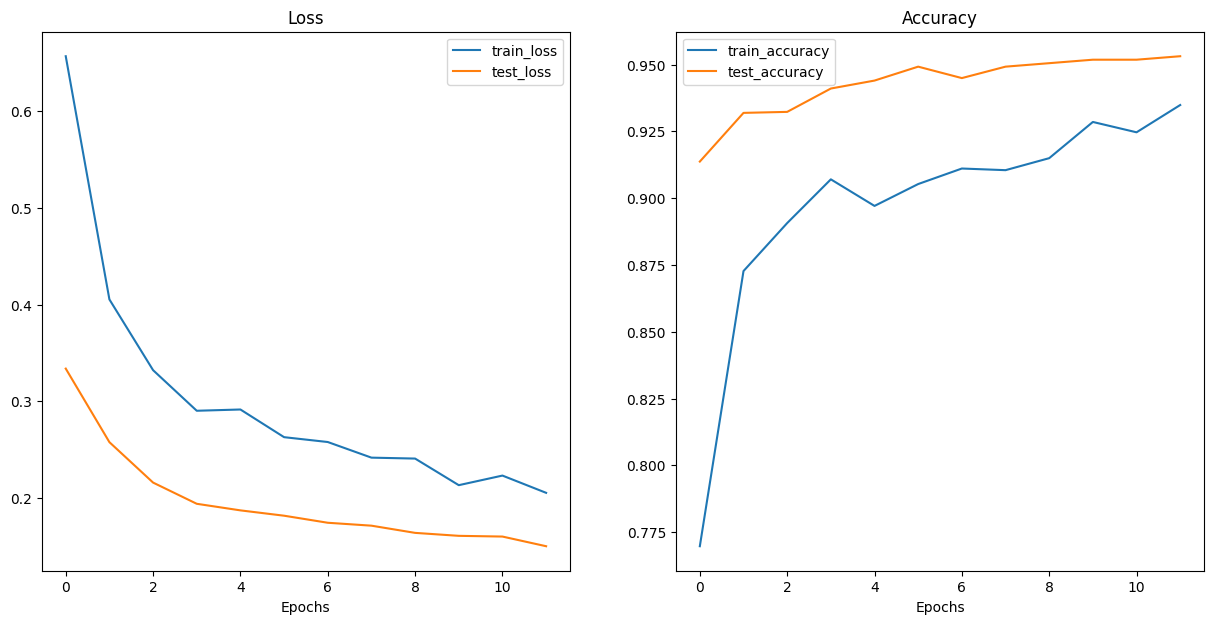

In [ ]:
plot_loss_curves(pretrained_model_1_results)

### Make predictions with pretraind model

In [ ]:
# Create a function pred_and_plot_image()
from typing import List, Tuple

from PIL import Image

# 1. Take in a trained model, class names, image path, image size, a transform and target device
def pred_and_plot_image_pretrained(model: torch.nn.Module,
                        image_path: str,
                        class_names: List[str],
                        image_size: Tuple[int, int] = (224, 224),
                        transform: torchvision.transforms = None,
                        device: torch.device=device):


  # 2. Open image
  img = Image.open(image_path)

  # 3. Create transformation for image (if one doesn't exist)
  if transform is not None:
    image_transform = transform
  else:
    image_transform = transforms.Compose([
            transforms.Resize(image_size),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225]),
        ])

  ### Predict on image ###

  # 4. Make sure the model is on the target device
  model.to(device)

  # 5. Turn on model evaluation mode and inference mode
  model.eval()
  with torch.inference_mode():
    # 6. Transform and add an extra dimension to image (model requires samples in [batch_size, color_channels, height, width])
    transformed_image = image_transform(img).unsqueeze(dim=0)

    # 7. Make a prediction on image with an extra dimension and send it to the target device
    target_image_pred = model(transformed_image.to(device))

  # 8. Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
  target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

  # 9. Convert prediction probabilities -> prediction labels
  target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

  # 10. Plot image with predicted label and probability
  plt.figure()
  plt.imshow(img)
  plt.title(f"Pred: {class_names[target_image_pred_label]} | Prob: {target_image_pred_probs.max():.3f}")
  plt.axis(False);

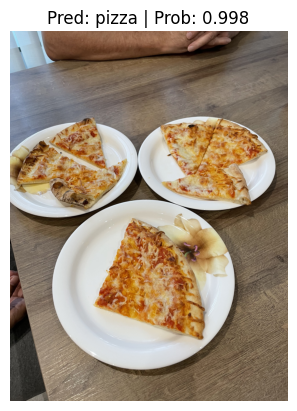

In [ ]:
# Setup custom image path
custom_image_path = "../data/my_pizza_5.jpeg"

# Predict on custom image
pred_and_plot_image_pretrained(model=pretrained_model_1,
                    image_path=custom_image_path,
                    class_names=three_class_names)

### Compare the results of our modelling experiments

In [ ]:
torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module
               ):

  """
  Returns a dictionary containing the results of model predicting on data_loader
  """

  loss, accuracy = 0, 0

  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):

      # Send the data and target to the target device
      X, y = X.to(device), y.to(device)

      # Make predictions
      y_pred = model(X)

      # Accumulate the loss and accuracy per batch (this is the batch loop)
      loss += loss_fn(y_pred, y)

      # Get the label
      y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
      accuracy += (y_pred_class == y).sum().item()/len(y_pred)

    # Scale loss and accuracy to find the average loss/accuracy per batch
    loss /= len(data_loader)
    accuracy /= len(data_loader)

  return {"model_name": model.__class__.__name__,
          "model_loss": loss.item(),
          "model_accuracy": accuracy}

EfficientNet_B0

In [ ]:
# pretrained_model
pretrained_model_1_dict = eval_model(model=pretrained_model_1,
                               data_loader=test_dataloader_trained,
                               loss_fn=nn.CrossEntropyLoss()
                             )
pretrained_model_1_dict

  0%|          | 0/24 [00:00<?, ?it/s]

{'model_name': 'EfficientNet',
 'model_loss': 0.1500965654850006,
 'model_accuracy': 0.953125}

My Model

In [ ]:
# my_model
my_model_1_dict = eval_model(model=my_model_1,
                               data_loader=test_dataloader,
                               loss_fn=nn.CrossEntropyLoss()
                             )
my_model_1_dict

  0%|          | 0/24 [00:00<?, ?it/s]

{'model_name': 'CNN1',
 'model_loss': 0.6428301334381104,
 'model_accuracy': 0.7410714285714285}

In [ ]:
import pandas as pd

compare_results = pd.DataFrame([pretrained_model_1_dict,
                                my_model_1_dict])
compare_results

model_name  model_loss  model_accuracy
0  EfficientNet    0.150097        0.953125
1          CNN1    0.642830        0.741071

Text(0, 0.5, 'model')

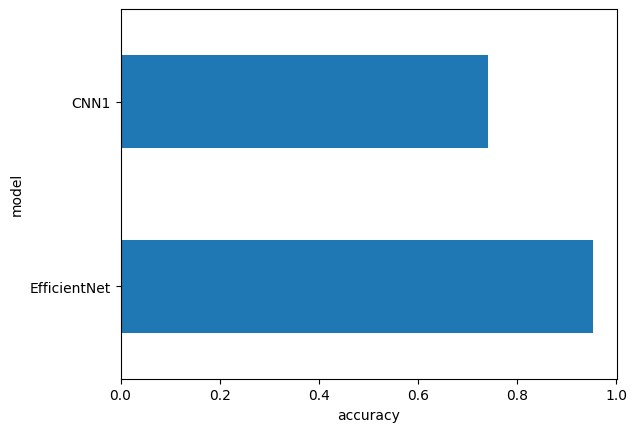

In [ ]:
# Visualize our model results
compare_results.set_index("model_name")["model_accuracy"].plot(kind="barh")
plt.xlabel("accuracy")
plt.ylabel("model")

### Making predictions across the whole test dataset

In [ ]:
def make_preds_whole_dataset(model: torch.nn.Module,
                             data_loader: torch.utils.data.DataLoader):

  y_preds = []

  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      X, y = X.to(device), y.to(device)

      test_logit = model(X)
      y_pred_probs = torch.softmax(test_logit, dim=1)
      y_pred = torch.argmax(y_pred_probs, dim=1)

      y_preds.append(y_pred)

  y_pred_tensor = torch.cat(y_preds).cpu()
  return y_pred_tensor

EfficientNet_B0

In [ ]:
# EfficientNet_B0
make_preds_whole_dataset(model=pretrained_model_1,
                         data_loader=test_dataloader_trained)

  0%|          | 0/24 [00:00<?, ?it/s]

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1,

In [ ]:
true_labels = torch.cat([y for X, y in test_dataloader_trained])
true_labels[:5]

tensor([0, 0, 0, 0, 0])

My Model

In [ ]:
# Model CNN1
make_preds_whole_dataset(model=my_model_1,
                         data_loader=test_dataloader)[:5]

  0%|          | 0/24 [00:00<?, ?it/s]

tensor([0, 0, 0, 0, 0])

In [ ]:
true_labels_my_model_1 = torch.cat([y for X, y in test_dataloader])
true_labels_my_model_1[:5]

tensor([0, 0, 0, 0, 0])

### Make a confusion matrix with the test preds and the truth labels

In [ ]:
try:
  import torchmetrics, mlxtend
  print(f'mlxtend version: {mlxtend.__version__}')
  assert int(mlxtend.__version__.split('.')[1] >= 19, 'mlxtend version should be 0.19.0 or higher')
except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f'mlxtend version: {mlxtend.__version__}')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 866.2/866.2 kB 41.6 MB/s eta 0:00:00
mlxtend version: 0.23.1


In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

EfficientNet_B0

In [ ]:
# Setup confusion instance and compare predictions to target predictions
confmat = ConfusionMatrix(num_classes = len(three_class_names), task='MULTICLASS')
confmat_tensor = confmat(preds=make_preds_whole_dataset(model=pretrained_model_1,
                                                        data_loader=test_dataloader_trained),
                         target=true_labels)

  0%|          | 0/24 [00:00<?, ?it/s]

In [ ]:
confmat_tensor

tensor([[245,   3,   2],
        [  6, 236,   8],
        [  4,  13, 233]])

My Model

In [ ]:
# Setup confusion instance and compare predictions to target predictions
cm_cnn1 = ConfusionMatrix(num_classes=len(three_class_names),
                          task='MULTICLASS')
cm_tensor_my_model_1 = cm_cnn1(make_preds_whole_dataset(model=my_model_1,
                                                      data_loader=test_dataloader),
                               true_labels_my_model_1)

  0%|          | 0/24 [00:00<?, ?it/s]

In [ ]:
cm_tensor_my_model_1

tensor([[186,  14,  50],
        [ 15, 191,  44],
        [ 44,  28, 178]])

EfficientNet_B0

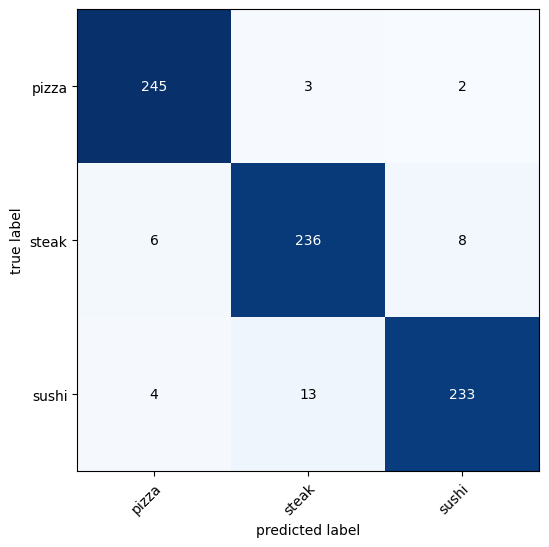

In [ ]:
# Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),        # Don't forget to add ".numpy()"
    class_names=three_class_names,
    figsize=(6, 6)
)

My Model

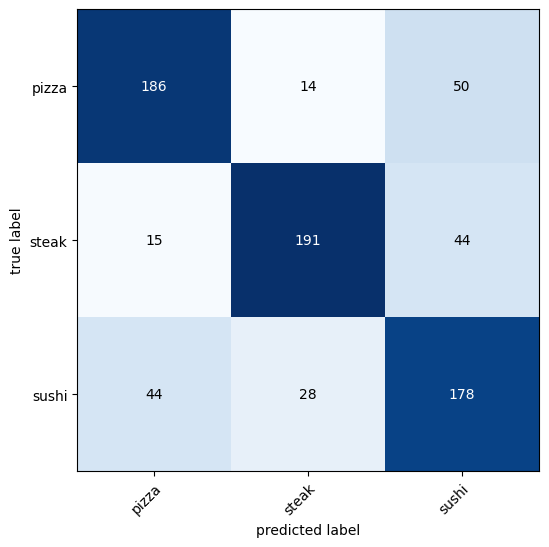

In [ ]:
# Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=cm_tensor_my_model_1.numpy(),        # Don't forget to add ".numpy()"
    class_names=three_class_names,
    figsize=(6, 6)
)

### Get the "most wrong" of the predictions on the test dataset and plot the 5 "most wrong" images

In [ ]:
test_dir

PosixPath('../data/pizza_steak_sushi_100_percent/test')

In [ ]:
from pathlib import Path

# Get all test data paths
test_data_paths = list(Path(test_dir).glob("*/*.jpg"))
test_labels = [path.parent.stem for path in test_data_paths]

# Create a function to return a list of dictionaries with image path, label, prediction, probability
def pred_and_store(test_paths, model, transform, class_names, device):
  test_pred_list = []

  for path in tqdm(test_paths):
    # Create empty dict to store info for each sample
    pred_dict = {}

    # Get image path
    pred_dict["image_path"] = path

    # Get class name
    class_name = path.parent.stem
    pred_dict["class_name"] = class_name

    # Get prediction and prediction probability

    # Open image
    from PIL import Image
    img = Image.open(path)
    transformed_image = transform(img).unsqueeze(0) # transform image and add batch dimension

    model.eval()
    with torch.inference_mode():

      # Logits
      pred_logit = model(transformed_image.to(device))
      # Logits -> pred prob
      pred_prob = torch.softmax(pred_logit, dim=1)
      # Pred prob -> labels
      pred_label = torch.argmax(pred_prob, dim=1)
      # Predicted class
      pred_class = three_class_names[pred_label.cpu()]

      # Make sure things in the dictionary are back on the CPU
      pred_dict["pred_prob"] = pred_prob.unsqueeze(0).max().cpu().item()
      pred_dict["pred_class"] = pred_class

    # Does the pred match the true label?
    pred_dict["correct"] = class_name == pred_class

    # Add the dictionary to the list of preds
    test_pred_list.append(pred_dict)

  return test_pred_list

EfficientNet_B0

In [ ]:
test_pred_dicts_pretrained_model_1 = pred_and_store(test_paths=test_data_paths,
                                                    model=pretrained_model_1,
                                                    transform=auto_transforms,
                                                    class_names=three_class_names,
                                                    device=device)

test_pred_dicts_pretrained_model_1[:2]

  0%|          | 0/750 [00:00<?, ?it/s]

[{'image_path': PosixPath('../data/pizza_steak_sushi_100_percent/test/steak/1302563.jpg'),
  'class_name': 'steak',
  'pred_prob': 0.9913986921310425,
  'pred_class': 'steak',
  'correct': True},
 {'image_path': PosixPath('../data/pizza_steak_sushi_100_percent/test/steak/3901703.jpg'),
  'class_name': 'steak',
  'pred_prob': 0.9961302280426025,
  'pred_class': 'steak',
  'correct': True}]

My Model

In [ ]:
test_pred_dicts_my_model_1 = pred_and_store(test_paths=test_data_paths,
                                            model=my_model_1,
                                            transform=data_transform,
                                            class_names=three_class_names,
                                            device=device)

test_pred_dicts_my_model_1[:2]

  0%|          | 0/750 [00:00<?, ?it/s]

[{'image_path': PosixPath('../data/pizza_steak_sushi_100_percent/test/steak/1302563.jpg'),
  'class_name': 'steak',
  'pred_prob': 0.5516843199729919,
  'pred_class': 'steak',
  'correct': True},
 {'image_path': PosixPath('../data/pizza_steak_sushi_100_percent/test/steak/3901703.jpg'),
  'class_name': 'steak',
  'pred_prob': 0.9872081875801086,
  'pred_class': 'steak',
  'correct': True}]

EfficientNet_B0

In [ ]:
import pandas as pd

# Turn the test_pred_dicts into a DataFrame
df_pretrained_model_1 = pd.DataFrame(test_pred_dicts_pretrained_model_1)
df_pretrained_model_1.head()

image_path class_name  pred_prob  \
0  ../data/pizza_steak_sushi_100_percent/test/ste...      steak   0.991399   
1  ../data/pizza_steak_sushi_100_percent/test/ste...      steak   0.996130   
2  ../data/pizza_steak_sushi_100_percent/test/ste...      steak   0.994414   
3  ../data/pizza_steak_sushi_100_percent/test/ste...      steak   0.796007   
4  ../data/pizza_steak_sushi_100_percent/test/ste...      steak   0.985700   

  pred_class  correct  
0      steak     True  
1      steak     True  
2      steak     True  
3      steak     True  
4      steak     True

In [ ]:
# Count occurrences of False in a column 'correct'
print(df_pretrained_model_1.correct.value_counts())
print()
# Show only False
print(f'Number of False: {df_pretrained_model_1.correct.value_counts().loc[False]}')

correct
True     714
False     36
Name: count, dtype: int64

Number of False: 36


In [ ]:
# Sort DataFrame by correct then by pred_prob
top_5_wrong_pretrained_model_1 = df_pretrained_model_1.sort_values(
    by=["correct", "pred_prob"], ascending=[True, False]
    ).head()

top_5_wrong_pretrained_model_1

image_path class_name  pred_prob  \
645  ../data/pizza_steak_sushi_100_percent/test/sus...      sushi   0.985214   
630  ../data/pizza_steak_sushi_100_percent/test/sus...      sushi   0.980399   
31   ../data/pizza_steak_sushi_100_percent/test/ste...      steak   0.905247   
41   ../data/pizza_steak_sushi_100_percent/test/ste...      steak   0.901379   
695  ../data/pizza_steak_sushi_100_percent/test/sus...      sushi   0.894133   

    pred_class  correct  
645      steak    False  
630      steak    False  
31       sushi    False  
41       pizza    False  
695      steak    False

In [ ]:
# Plot the top 5 most wrong images
most_wrong_image_path_pretrained_model_1 = top_5_wrong_pretrained_model_1.image_path.tolist()
most_wrong_image_path_pretrained_model_1

[PosixPath('../data/pizza_steak_sushi_100_percent/test/sushi/624916.jpg'),
 PosixPath('../data/pizza_steak_sushi_100_percent/test/sushi/710402.jpg'),
 PosixPath('../data/pizza_steak_sushi_100_percent/test/steak/2576310.jpg'),
 PosixPath('../data/pizza_steak_sushi_100_percent/test/steak/39461.jpg'),
 PosixPath('../data/pizza_steak_sushi_100_percent/test/sushi/110811.jpg')]

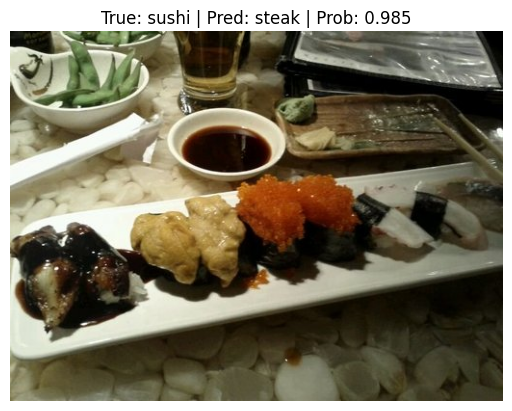

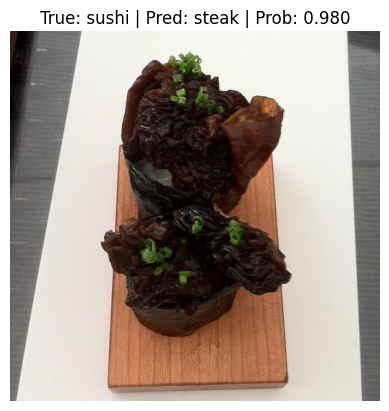

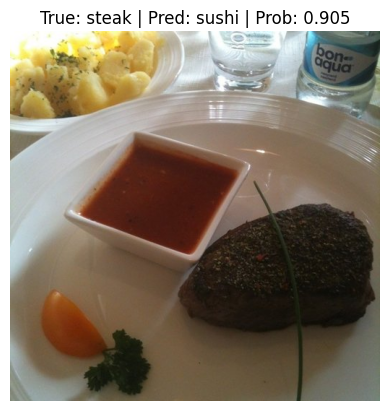

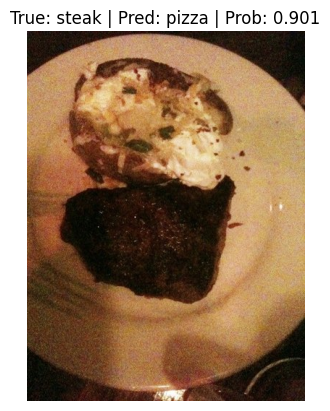

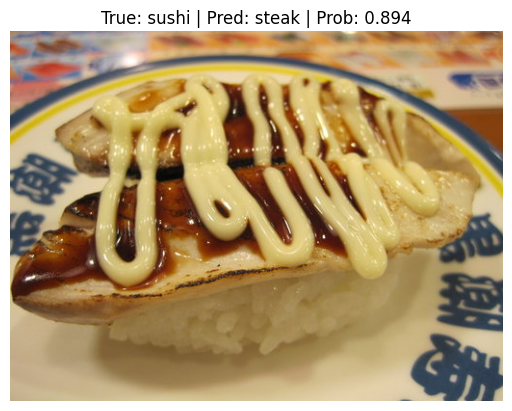

In [ ]:
import torchvision
import matplotlib.pyplot as plt

# Plot the top 5 most wrong images
for row in top_5_wrong_pretrained_model_1.iterrows():
  row = row[1]
  image_path = row.iloc[0]
  true_label = row.iloc[1]
  pred_prob = row.iloc[2]
  pred_class = row.iloc[3]

  # Plot the image and various details
  img = torchvision.io.read_image(str(image_path)) # get image as tensor
  plt.figure()
  plt.imshow(img.permute(1, 2, 0)) # matplotlib likes images in [height, width, color_channels]
  plt.title(f"True: {true_label} | Pred: {pred_class} | Prob: {pred_prob:.3f}")
  plt.axis(False)

My Model

In [ ]:
import pandas as pd

# Turn the test_pred_dicts into a DataFrame
df_my_model_1 = pd.DataFrame(test_pred_dicts_my_model_1)
df_my_model_1.head()

image_path class_name  pred_prob  \
0  ../data/pizza_steak_sushi_100_percent/test/ste...      steak   0.551684   
1  ../data/pizza_steak_sushi_100_percent/test/ste...      steak   0.987208   
2  ../data/pizza_steak_sushi_100_percent/test/ste...      steak   0.990303   
3  ../data/pizza_steak_sushi_100_percent/test/ste...      steak   0.629307   
4  ../data/pizza_steak_sushi_100_percent/test/ste...      steak   0.878662   

  pred_class  correct  
0      steak     True  
1      steak     True  
2      steak     True  
3      steak     True  
4      steak     True

In [ ]:
# Count occurrences of False in a column 'correct'
print(df_my_model_1.correct.value_counts())
print()
# Show only False
print(f'Number of False: {df_my_model_1.correct.value_counts().loc[False]}')

correct
True     555
False    195
Name: count, dtype: int64

Number of False: 195


In [ ]:
# Sort DataFrame by correct then by pred_prob
top_5_wrong_my_model_1 = df_my_model_1.sort_values(
    by=["correct", "pred_prob"], ascending=[True, False]
    ).head()

top_5_wrong_my_model_1

image_path class_name  pred_prob  \
747  ../data/pizza_steak_sushi_100_percent/test/sus...      sushi   0.999357   
630  ../data/pizza_steak_sushi_100_percent/test/sus...      sushi   0.994299   
667  ../data/pizza_steak_sushi_100_percent/test/sus...      sushi   0.983460   
298  ../data/pizza_steak_sushi_100_percent/test/piz...      pizza   0.974300   
357  ../data/pizza_steak_sushi_100_percent/test/piz...      pizza   0.971985   

    pred_class  correct  
747      steak    False  
630      steak    False  
667      steak    False  
298      sushi    False  
357      sushi    False

In [ ]:
# Plot the top 5 most wrong images
most_wrong_image_path_my_model_1 = top_5_wrong_my_model_1.image_path.tolist()
most_wrong_image_path_my_model_1

[PosixPath('../data/pizza_steak_sushi_100_percent/test/sushi/3587740.jpg'),
 PosixPath('../data/pizza_steak_sushi_100_percent/test/sushi/710402.jpg'),
 PosixPath('../data/pizza_steak_sushi_100_percent/test/sushi/2291643.jpg'),
 PosixPath('../data/pizza_steak_sushi_100_percent/test/pizza/398812.jpg'),
 PosixPath('../data/pizza_steak_sushi_100_percent/test/pizza/242976.jpg')]

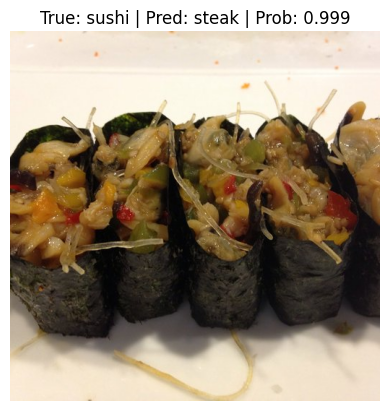

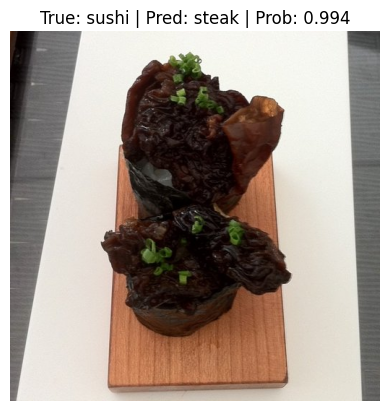

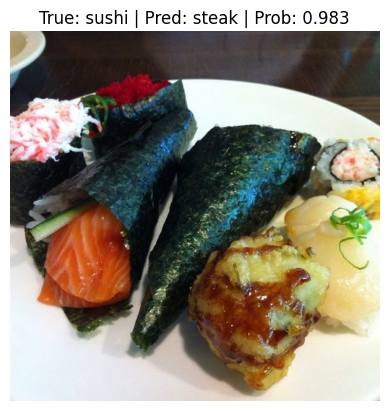

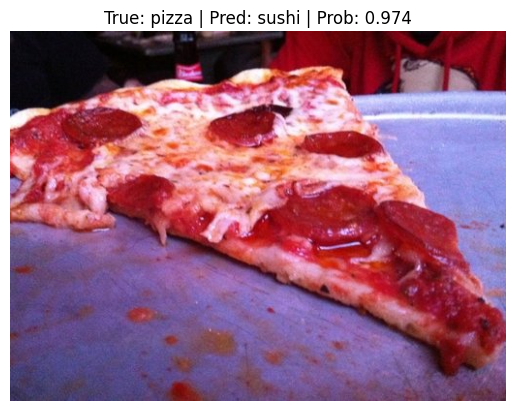

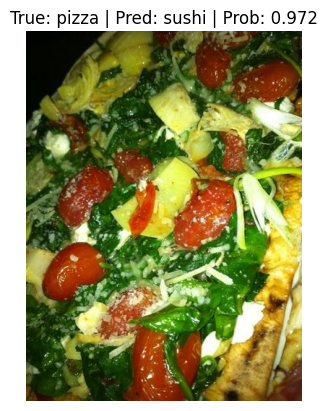

In [ ]:
# Plot the top 5 most wrong images
for row in top_5_wrong_my_model_1.iterrows():
  row = row[1]
  image_path = row.iloc[0]
  true_label = row.iloc[1]
  pred_prob = row.iloc[2]
  pred_class = row.iloc[3]

  # Plot the image and various details
  img = torchvision.io.read_image(str(image_path)) # get image as tensor
  plt.figure()
  plt.imshow(img.permute(1, 2, 0)) # matplotlib likes images in [height, width, color_channels]
  plt.title(f"True: {true_label} | Pred: {pred_class} | Prob: {pred_prob:.3f}")
  plt.axis(False)

### Plot some random images

In [ ]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
    pred_probs = []

    model.eval()
    with torch.inference_mode():
      for sample in data:
        # Prepare sample - add an extra dimension and send sample to device
        sample = torch.unsqueeze(sample, dim=0).to(device)

        # Forward pass (model outputs raw logit)
        pred_logit = model(sample)
        # Get prediction probability (logit -> prediction probability)
        pred_prob = torch.softmax(pred_logit.squeeze(), dim=0) # NOTE:
                                                               # perform softmax on the "logits" dimension,
                                                               # not "batch" dimension
                                                               # (in this case we have a batch size of 1, so can perform on dim=0)
        # Get pred_prob off GPU for further calculations
        pred_probs.append(pred_prob.cpu())

    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

My Model

In [ ]:
import random
# random.seed(42)

test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=20):
  test_samples.append(sample)
  test_labels.append(label)

# View the first test sample shape and label
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({three_class_names[test_labels[0]]})")

Test sample image shape: torch.Size([3, 32, 32])
Test sample label: 1 (steak)


In [ ]:
# Make predictions on test samples with my_model_1
pred_probs = make_predictions(model=my_model_1,
                              data=test_samples)

# View first two prediction probabilities list
pred_probs[:3]

tensor([[0.0021, 0.9579, 0.0400],
        [0.2948, 0.1649, 0.5403],
        [0.4272, 0.0976, 0.4752]])

In [ ]:
# Turn the prediction probabilities into prediction labels by taking the argmax()
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([1, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 1, 1, 2, 0, 2, 2, 2, 2, 2])

In [ ]:
# Are our predictions in the same form as our test labels?
test_labels, pred_classes

([1, 2, 1, 2, 0, 2, 0, 0, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2],
 tensor([1, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 1, 1, 2, 0, 2, 2, 2, 2, 2]))

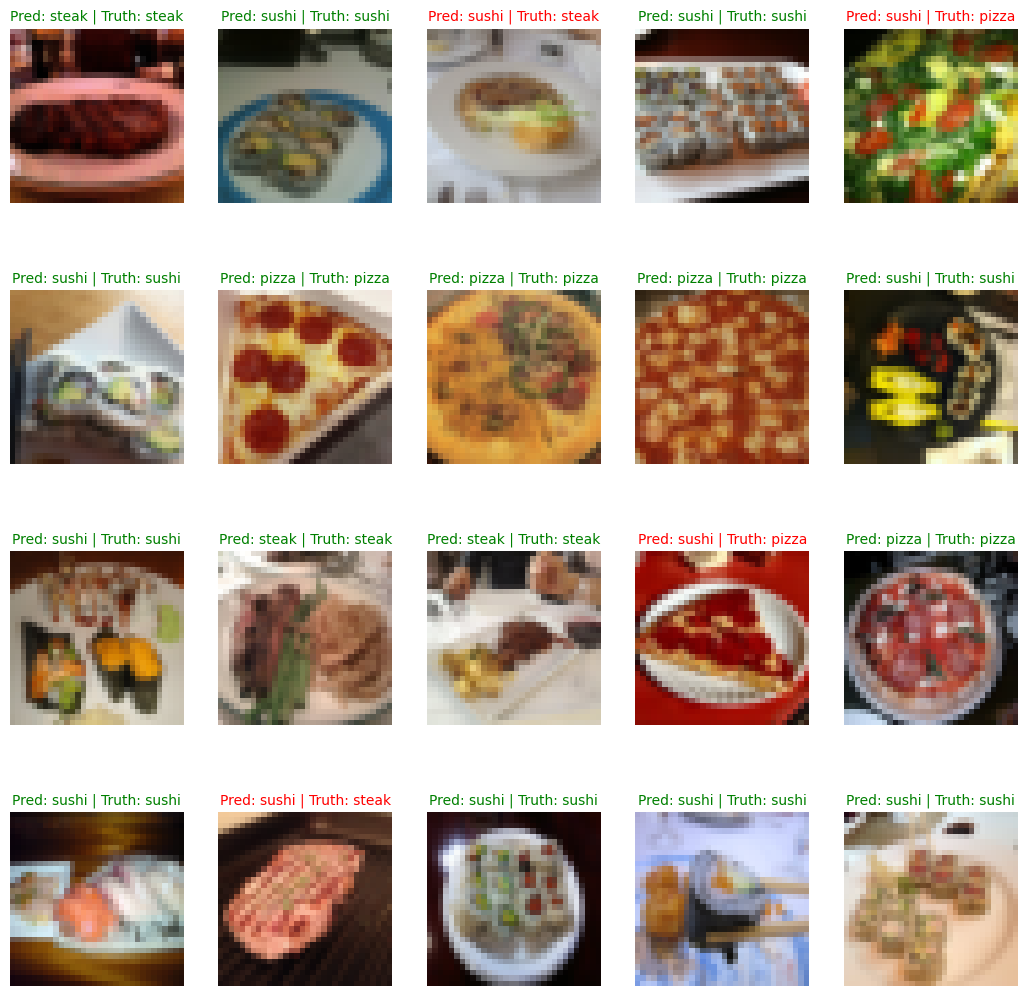

In [ ]:
# Plot predictions
plt.figure(figsize=(13, 13))
nrows = 4
ncols = 5

for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1) # i+1 -> it can't start with 0

  # Plot the target image
  plt.imshow(sample.permute(1, 2, 0)) # NOTE: matplotlib likes images in [height, width, color_channels]

  # Find the prediction label (in text form, e.g. "Steak")
  pred_label = three_class_names[pred_classes[i]]

  # Get the truth label (in text form, e.g. "Pizza")
  truth_label = three_class_names[test_labels[i]]

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);

EfficientNet_B0

In [ ]:
import random
# random.seed(42)

# Get a dictionary
class_to_index = train_data.class_to_idx # {'pizza': 0, 'steak': 1, 'sushi': 2}

test_samples_trained = []
test_labels_trained = []

# Get all test data paths
test_data_paths = list(Path(test_dir).glob("*/*.jpg"))
# labels = [path.parent.stem for path in test_data_paths]

# for sample, label in random.sample(list(test_data_trained), k=20):
for path in random.sample(test_data_paths, k=20):
  # 0. Get label
  label = path.parent.stem
  test_label = class_to_index[label]
  test_labels_trained.append(test_label)

  # 1. Load in image and convert the tensor values to float32
  target_image = torchvision.io.read_image(str(path))

  # 2. Divide the image pixel values by 255 to get them between [0, 1]
  target_image = target_image / 255

  # 3. Transform the image
  new_transform = transforms.Compose([
            transforms.Resize(size=(224, 224)),
        ])

  transformed_image = new_transform(target_image)

  # 4. Add to the list
  test_samples_trained.append(transformed_image)

print(test_samples_trained[0].shape)
print(test_samples_trained[0].dtype)
print(test_labels_trained[:5])

torch.Size([3, 224, 224])
torch.float32
[1, 0, 2, 2, 0]


In [ ]:
# Make predictions on test samples with my_model_1
pred_probs_trained = make_predictions(model=pretrained_model_1,
                                      data=test_samples_trained)

# View first two prediction probabilities list
pred_probs_trained[:3]

tensor([[0.1959, 0.4797, 0.3243],
        [0.3555, 0.3283, 0.3162],
        [0.5292, 0.3296, 0.1412]])

In [ ]:
# Turn the prediction probabilities into prediction labels by taking the argmax()
pred_classes_trained = pred_probs_trained.argmax(dim=1)
pred_classes_trained

tensor([1, 0, 0, 1, 1, 2, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1])

In [ ]:
# Are our predictions in the same form as our test labels?
test_labels_trained, pred_classes_trained

([1, 0, 2, 2, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0],
 tensor([1, 0, 0, 1, 1, 2, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1]))

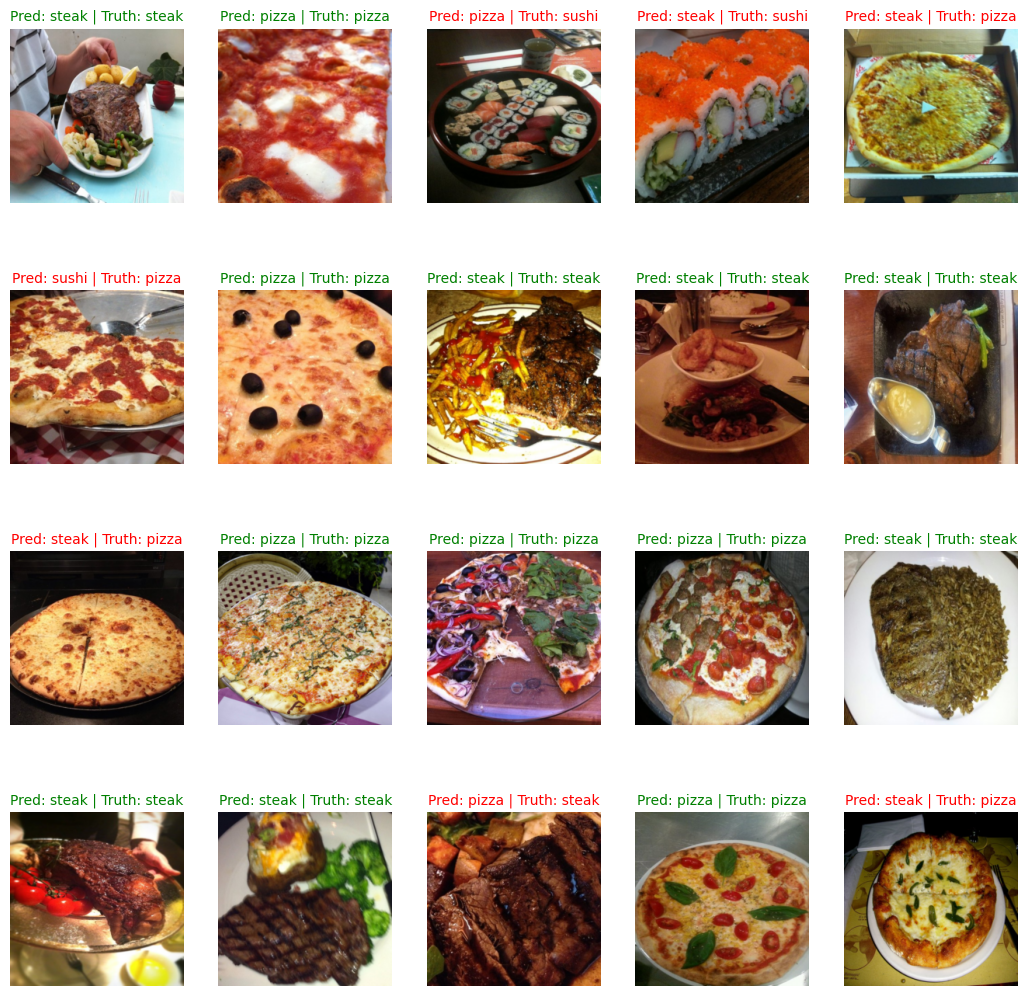

In [ ]:
# Plot predictions
plt.figure(figsize=(13, 13))
nrows = 4
ncols = 5

for i, sample in enumerate(test_samples_trained):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1) # i+1 -> it can't start with 0

  # Plot the target image
  plt.imshow((sample.numpy() * 255).astype(np.uint8).transpose(1, 2, 0))

  # Find the prediction label (in text form, e.g. "Steak")
  pred_label = three_class_names[pred_classes_trained[i]]

  # Get the truth label (in text form, e.g. "Pizza")
  truth_label = three_class_names[test_labels_trained[i]]

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False)

### Calculate accuracy for class

My Model

In [ ]:
# Prepare to count predictions for each class
correct_pred = {classname: 0 for classname in three_class_names}
total_pred = {classname: 0 for classname in three_class_names}

# again no gradients needed
with torch.inference_mode():
    for data in test_dataloader:
        images, labels = data
        # Forward pass
        logits = my_model_1(images.to(device))
        _, predictions = torch.max(logits, dim=1)

        # Collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
              correct_pred[three_class_names[label]] += 1
            total_pred[three_class_names[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: pizza is 74.4 %
Accuracy for class: steak is 76.4 %
Accuracy for class: sushi is 71.2 %


EfficientNet_B0

In [ ]:
# Prepare to count predictions for each class
correct_pred = {classname: 0 for classname in three_class_names}
total_pred = {classname: 0 for classname in three_class_names}

# again no gradients needed
with torch.inference_mode():
    for data in test_dataloader_trained:
        images, labels = data
        # Forward pass
        logits = pretrained_model_1(images.to(device))
        _, predictions = torch.max(logits, dim=1)

        # Collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
              correct_pred[three_class_names[label]] += 1
            total_pred[three_class_names[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: pizza is 98.0 %
Accuracy for class: steak is 94.4 %
Accuracy for class: sushi is 93.2 %


### Saving the models

EfficientNet_B0

In [ ]:
from pathlib import Path

# Create models directory (if it doesn't already exist), see: https://docs.python.org/3/library/pathlib.html#pathlib.Path.mkdir
MODEL_PATH = Path("../data/models")
MODEL_PATH.mkdir(parents=True, # create parent directories if needed
                 exist_ok=True # if models directory already exists, don't error
)

# Create model save path
MODEL_NAME = "pretrained_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=pretrained_model_1.to(device).state_dict(), # only saving the state_dict() only saves the learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: ../data/models/pretrained_model_1.pth


My Model

In [ ]:
from pathlib import Path

# Create models directory (if it doesn't already exist), see: https://docs.python.org/3/library/pathlib.html#pathlib.Path.mkdir
MODEL_PATH = Path("../data/models")
MODEL_PATH.mkdir(parents=True, # create parent directories if needed
                 exist_ok=True # if models directory already exists, don't error
)

# Create model save path
MODEL_NAME = "my_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=my_model_1.to(device).state_dict(), # only saving the state_dict() only saves the learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: ../data/models/my_model_1.pth


### Loading the models

My Model

In [ ]:
torch.manual_seed(42)
# Create a new instance of CNN1 (the same class as our saved state_dict())
loaded_my_model_1 = CNN1(n_filters=15, p=0.3).to(device)

# Load in the saved state_dict()
loaded_my_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH, weights_only=True))

<All keys matched successfully>

In [ ]:
loaded_my_model_1

CNN1(
  (conv1): Conv2d(3, 15, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(15, 15, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=540, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=3, bias=True)
  (drop): Dropout(p=0.3, inplace=False)
)

In [ ]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_my_model_1_results = eval_model(
    model=loaded_my_model_1,
    data_loader=test_dataloader,
    loss_fn=nn.CrossEntropyLoss(),
)

loaded_my_model_1_results

  0%|          | 0/24 [00:00<?, ?it/s]

{'model_name': 'CNN1',
 'model_loss': 0.6428301334381104,
 'model_accuracy': 0.7410714285714285}

In [ ]:
# Check to see if results are close to each other (if they are very far away, there may be an error)
torch.isclose(torch.tensor(my_model_1_dict["model_loss"]),
              torch.tensor(loaded_my_model_1_results["model_loss"]),
              atol=1e-08, # absolute tolerance
              rtol=0.0001) # relative tolerance

tensor(True)

EfficientNet_B0

In [ ]:
torch.manual_seed(42)
# Create a new instance of CNN1 (the same class as our saved state_dict())
loaded_pretrained_model_1 = torchvision.models.efficientnet_b0(weights=weights).to(device)

# Recreate the classifier layer
loaded_pretrained_model_1.classifier = nn.Sequential(
    nn.Dropout(p=0.2, inplace=True),
    nn.Linear(in_features=1280,
              out_features=output_shape,
              bias=True)).to(device)

# Load in the saved state_dict()
loaded_pretrained_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH, weights_only=True))

# Send model to GPU
loaded_pretrained_model_1 = loaded_pretrained_model_1.to(device)

In [ ]:
loaded_pretrained_model_1

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [ ]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_pretrained_model_1_results = eval_model(
    model=loaded_pretrained_model_1,
    data_loader=test_dataloader_trained,
    loss_fn=nn.CrossEntropyLoss(),
)

loaded_pretrained_model_1_results

  0%|          | 0/24 [00:00<?, ?it/s]

{'model_name': 'EfficientNet',
 'model_loss': 0.1500965654850006,
 'model_accuracy': 0.953125}

In [ ]:
# Check to see if results are close to each other (if they are very far away, there may be an error)
torch.isclose(torch.tensor(pretrained_model_1_dict["model_loss"]),
              torch.tensor(loaded_pretrained_model_1_results["model_loss"]),
              atol=1e-08, # absolute tolerance
              rtol=0.0001) # relative tolerance

tensor(True)

### Make predictions with the loaded model

My model

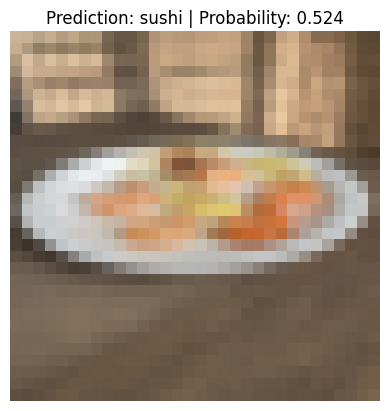

In [ ]:
pred_and_plot_image(model=loaded_my_model_1,
                    image_path=custom_image_path,
                    class_names=three_class_names,
                    transform=custom_image_transform,
                    device=device)

EfficientNet_B0

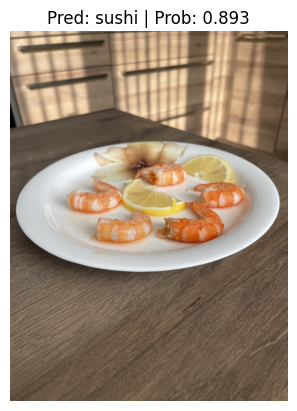

In [ ]:
pred_and_plot_image_pretrained(model=loaded_pretrained_model_1,
                    image_path=custom_image_path,
                    class_names=three_class_names,
                    transform=auto_transforms,
                    device=device)